In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
#import random
%matplotlib inline
from matplotlib import animation
from matplotlib.widgets import Slider
from ipywidgets import interact, interactive, fixed
import scipy.integrate as integrate

from matplotlib import animation
from IPython.display import HTML

In [2]:
num=30;
A_n=np.zeros(num)
for i in range(num):
    if i%2 == 0:
        A_n[i] = integrate.quad(lambda x: -2*np.sin(2*np.pi*x)*np.sqrt(2)*np.sin(i*np.pi*x), -0.5, 0)[0];
    else:
        A_n[i] = integrate.quad(lambda x: -2*np.sin(2*np.pi*x)*np.sqrt(2)*np.cos(i*np.pi*x), -0.5, 0)[0];
        
A_n


array([ -0.00000000e+00,   6.00210877e-01,  -7.07106781e-01,
        -3.60126526e-01,  -2.87045049e-17,  -8.57444111e-02,
        -2.08166817e-17,  -4.00140585e-02,   6.56253944e-17,
        -2.33848394e-02,   7.63278329e-17,  -1.53900225e-02,
        -4.49686573e-17,  -1.09129250e-02,  -7.28583860e-17,
        -8.14765897e-03,   1.60203572e-16,  -6.31800924e-03,
        -9.54097912e-17,  -5.04378889e-03,  -1.48356057e-17,
        -4.12044081e-03,  -2.77555756e-17,  -3.42977644e-03,
        -1.21833194e-16,  -2.89956946e-03,   1.28369537e-16,
        -2.48363122e-03,   2.33815144e-16,  -2.15129347e-03])

In [3]:
np.sum(A_n**2)

0.99997992358457999

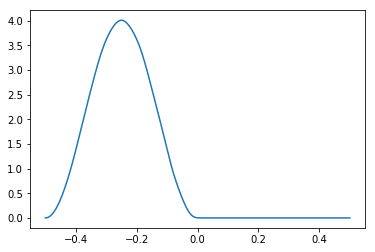

In [4]:
a=1
x_s=500
x = np.linspace(-a/2, a/2, x_s)
psi=0*x
t=0

for i in range(num):
    if i%2 == 0:
        psi=psi+A_n[i]*np.sqrt(2)*np.sin(i*np.pi*x)*np.exp(1j*np.pi**2*t*i*i/2)
    else:
        psi=psi+A_n[i]*np.sqrt(2)*np.cos(i*np.pi*x)*np.exp(1j*np.pi**2*t*i*i/2)
        
prob=psi*np.conj(psi)      
plt.plot(x,np.real(prob))

In [5]:
myfigsize=(8,6)

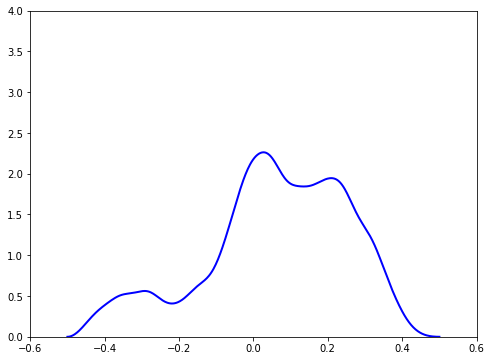

In [6]:
outerlim = 0.6
fig = plt.figure(figsize=myfigsize)
ax = plt.axes(xlim=(-outerlim, outerlim), ylim=(0, 4))
line, = ax.plot([], [], lw=2, color='blue')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially

a=1
x_s=500
tstep=100

def animate(t):
    x = np.linspace(-a/2, a/2, x_s)
    psi=0*x
    for i in range(num):
        if i%2 == 0:
            psi=psi+A_n[i]*np.sqrt(2)*np.sin(i*np.pi*x)*np.exp(-1j*np.pi**2*t*i*i/tstep)
        else:
            psi=psi+A_n[i]*np.sqrt(2)*np.cos(i*np.pi*x)*np.exp(-1j*np.pi**2*t*i*i/tstep)
        
        y=np.real(psi*np.conj(psi) )     

    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)
HTML(ani.to_jshtml())
#ani